In [1]:
import simulation_commander as simc
import grSim_Commands_pb2
import grSim_Packet_pb2
import time
import numpy as np
import math

client = simc.Client(ip='127.0.0.1', port=20011)

In [2]:
def prep_message_and_send(yellowTeam, id, kickspeedx, kickspeedz, veltangent, velnormal, velangular, spinner, wheelsspeed, wheel1, wheel2, wheel3, wheel4):
    packet = grSim_Packet_pb2.grSim_Packet()
    packet.commands.isteamyellow = yellowTeam
    packet.commands.timestamp = 0
    robot_command = grSim_Commands_pb2.grSim_Robot_Command()
    robot_command.id = id
    robot_command.kickspeedx = kickspeedx
    robot_command.kickspeedz = kickspeedz
    robot_command.veltangent = veltangent
    robot_command.velnormal = velnormal
    robot_command.velangular = velangular
    robot_command.spinner = spinner
    robot_command.wheelsspeed = wheelsspeed
    robot_command.wheel1 = wheel1   # front left
    robot_command.wheel2 = wheel2   # back left
    robot_command.wheel3 = wheel3   # back right
    robot_command.wheel4 = wheel4   # front right
    packet.commands.robot_commands.append(robot_command)
    
    while True:
        client.send(packet)
        time.sleep(0.01)

In [17]:


R = 0.09

r=0.27

######## Angulos das rodas em relação ao eixo x
######## 0 -> 30 graus front right
######## 1 -> 150 graus front left
######## 2 -> 225 graus back left
######## 3 -> 315 graus back right
wheel_alngles = [math.pi/6, (math.pi*5)/6, (math.pi*5)/4, (math.pi*7)/4]

######## Matriz Jacobiana
jacobian = np.matrix([[math.sin(wheel_alngles[0]), math.cos(wheel_alngles[0]), R],
                      [math.sin(wheel_alngles[1]), math.cos(wheel_alngles[1]), R],
                      [math.sin(wheel_alngles[2]), math.cos(wheel_alngles[2]), R],
                      [math.sin(wheel_alngles[3]), math.cos(wheel_alngles[3]), R],])

######## Eixo x, eixo y, rotação
velocities = np.matrix([[0], [10], [0]])

In [14]:
velocities

matrix([[1],
        [1],
        [0]])

In [18]:
wheels_acc = (1/r*jacobian*velocities).T.tolist()[0]
wheels_acc

[3.2075014954979206,
 -3.2075014954979206,
 -2.618914004394621,
 2.6189140043946195]

In [ ]:
import grSim_Replacement_pb2

packet = grSim_Packet_pb2.grSim_Packet()
robot_replacement = grSim_Replacement_pb2.grSim_RobotReplacement()
robot_replacement.x = 0
robot_replacement.y = 4.5
robot_replacement.dir = 270
robot_replacement.id = 0
robot_replacement.yellowteam = 1
packet.replacement.robots.append(robot_replacement)


client.send(packet)
time.sleep(0.01)

In [19]:
prep_message_and_send(True, 0, 0, 0, 0, 0, 0, 0, 1, wheels_acc[1], wheels_acc[2], wheels_acc[3], wheels_acc[0])

KeyboardInterrupt: 

In [ ]:
from move import *

test_bang_bang_optimal()

28.013112870585402 17.740124498424684
19.674202212356807 10.086808443498516
4.633204461516936 3.7919799754546935
23.40342524721446 17.55393027998018
23.3320195846468 18.47916807864199
15.63750344055483 13.11104796289499
14.6491042694318 9.110646635707784
19.505005350909162 14.198915913846692
18.6710643908912 13.210322791038115
3.6987560250919076 3.5525552470947392
17.288851543454566 14.60556581722985
11.529081394867983 11.097039438990805
11.844714669231085 9.891050441657796
4.849701968918204 4.8364899792142095
15.563576550635403 14.410010758586449
2.9689014343551334 2.9607045509446
16.232305560818972 13.180910239907185
3.53867343521991 3.220739119241821
25.351964643151376 10.188080561514683
5.204022640681368 4.772768531838946
1.9806276593692336 1.946841653121183
2.861150736198036 2.6879154470606608
31.24830361761623 18.450429196517156
17.191439406368524 11.269256571987487
10.868471778788592 8.688360689603776
27.403593253736094 17.94906256710896
7.063845833864093 6.457751785485971
12.69

[[[1, -1], 59.92121082694886], [[1, 0.4269663474296331], 45.21027712525338], [[-1, 0.4269663474296331], 95.13148795220224]]


KeyboardInterrupt: 

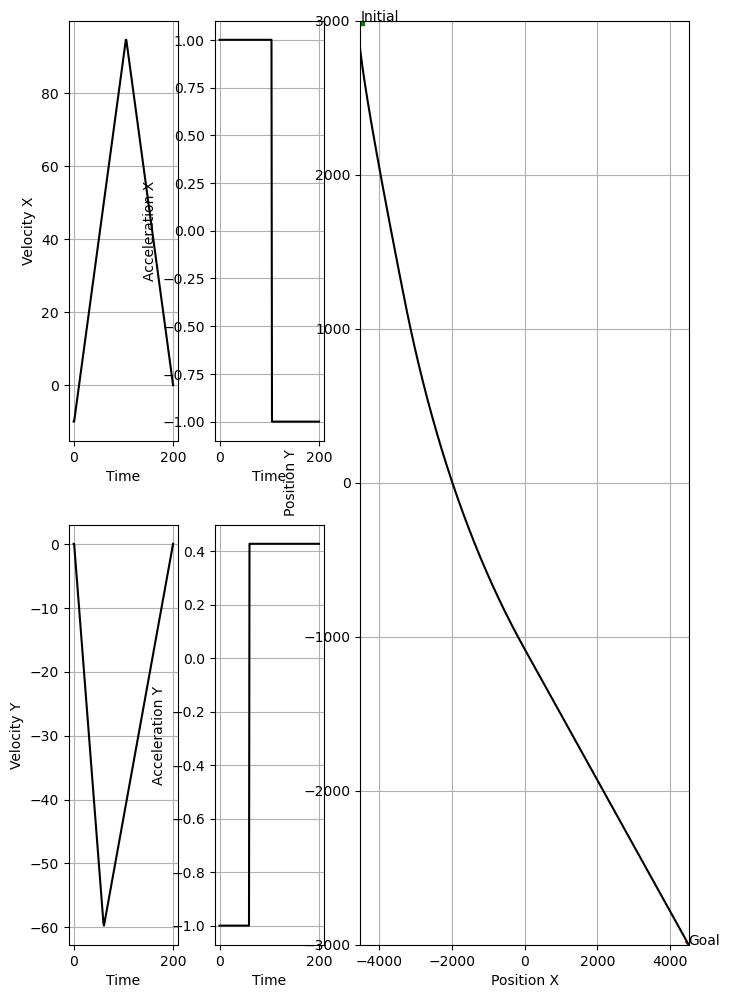

In [ ]:
from move import *

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import time
 
start_time = time.time()
############################################
pos_x = -4500
pos_y = 3000.0
vel_x = -10.0
vel_y = 0.0

goal_pos_x = 4500
goal_pos_y = -3000
goal_vel_x = 0
goal_vel_y = 0.0

x_init = (pos_x, pos_y, vel_x, vel_y)
x_goal = (goal_pos_x, goal_pos_y, goal_vel_x, goal_vel_y)

steer_start_time = time.time()
control_path = time_optimal_steer_2d(x_init, x_goal)
steer_comp_time = time.time() - steer_start_time

control_time = control_time(control_path)

time_unit = 1

path_position_x = [pos_x]
path_position_y = [pos_y]
path_velocity_x = [vel_x]
path_velocity_y = [vel_y]
acc_x = []
acc_y = []

discrete_time = np.linspace(0, control_time, num=int(control_time/time_unit))
print(control_path)
for t in discrete_time:
    sub_path = []
    total_time = 0
    for session in control_path:
            if session[1] + total_time < t:
                sub_path.append(session)
                total_time += session[1]
            else:
                sub_path.append([session[0], t - total_time])
                break

    current_state = integrate_control_2d((pos_x, pos_y, vel_x, vel_y), sub_path)
    
    path_position_x.append(current_state[0])
    path_position_y.append(current_state[1])
    path_velocity_x.append(current_state[2])
    path_velocity_y.append(current_state[3])
    acc_x.append(sub_path[-1][0][0])
    acc_y.append(sub_path[-1][0][1])

# for control_session in control_path:
#     for dt in np.arange(0, control_session[1], time_unit):
#         vx = path_velocity_x[-1] + control_session[0][0] * time_unit
#         vy = path_velocity_y[-1] + control_session[0][1] * time_unit

#         x = path_position_x[-1] + vx * time_unit
#         y = path_position_y[-1] + vy * time_unit

#         path_position_x.append(x)
#         path_position_y.append(y)
#         path_velocity_x.append(vx)
#         path_velocity_y.append(vy)
#         acc_x.append(control_session[0][0])
#         acc_y.append(control_session[0][1])

final_time = time.time() - start_time
############################################


fig = plt.figure(figsize=(8, 12))
gs = gridspec.GridSpec(2, 3, width_ratios=[2, 2, 6], height_ratios=[1, 1])

velocity_x_plot = plt.subplot(gs[0, 0])
velocity_y_plot = plt.subplot(gs[1, 0])
acc_x_plot = plt.subplot(gs[0, 1])
acc_y_plot = plt.subplot(gs[1, 1])
position_plot = plt.subplot(gs[:, 2])

X_axis = np.arange(0, control_time, time_unit)

velocity_x_plot.plot(X_axis, path_velocity_x[0:len(X_axis)], color='black')
velocity_x_plot.set_xlabel('Time')
velocity_x_plot.set_ylabel('Velocity X')
velocity_x_plot.grid()

velocity_y_plot.plot(X_axis, path_velocity_y[0:len(X_axis)], color='black')
velocity_y_plot.set_xlabel('Time')
velocity_y_plot.set_ylabel('Velocity Y')
velocity_y_plot.grid()

acc_x_plot.plot(X_axis[0:len(acc_x)], acc_x, color='black')
acc_x_plot.set_xlabel('Time')
acc_x_plot.set_ylabel('Acceleration X')
acc_x_plot.grid()

acc_y_plot.plot(X_axis[0:len(acc_x)], acc_y, color='black')
acc_y_plot.set_xlabel('Time')
acc_y_plot.set_ylabel('Acceleration Y')
acc_y_plot.grid()

position_plot.axis([-4500, 4500, -3000, 3000])

position_plot.plot(path_position_x[0:len(X_axis)], path_position_y[0:len(X_axis)], color='black')
position_plot.set_xlabel('Position X')
position_plot.set_ylabel('Position Y')
position_plot.scatter(pos_x, pos_y, marker=',', color='green')
position_plot.annotate('Initial', (pos_x, pos_y))
position_plot.scatter(goal_pos_x, goal_pos_y, marker='x', color='red')
position_plot.annotate('Goal', (goal_pos_x, goal_pos_y))
position_plot.grid()

# obstacle_plt = plt.Circle((-0, -0), 90, color='red')
# padding_plt = plt.Circle((-0, -0), 180, color='red', fill=False)
# position_plot.add_patch(obstacle_plt)
# position_plot.add_patch(padding_plt)

# obstacle1 = StaticRobotObstacle(-0, -0, 90)
x, y = [], []
check_time = 1
index = 0
points_checked = []
while check_time <= control_time:
    sub_path = []
    total_time = 0
    for session in control_path:
            if session[1] + total_time < check_time:
                sub_path.append(session)
                total_time += session[1]
            else:
                sub_path.append([session[0], check_time - total_time])
                break
    # ponto
    check_state = integrate_control_2d((pos_x, pos_y, vel_x, vel_y), sub_path)
    # is there a collision
    # collision = obstacle1.is_collision(np.array([check_state[0], check_state[1]]), 90)
    # if collision:
    #     print(f'collision on {check_state[0]} {check_state[1]}')
    # # time off set
    # distance = obstacle1.calc_distance(np.array([check_state[0], check_state[1]]))
    # # print(distance, dynamic_step_over_path(distance))
    # check_time += dynamic_step_over_path(distance, control_time, 1)

    # points_checked.append([[check_state[0], check_state[1]], collision])
    # x.append(check_state[0])
    # y.append(check_state[1])

print(f'Points checked for colision {len(points_checked)}')

position_plot.scatter(x, y, marker='.', color='blue')

plt.title('Rest to Rest Bang Bang Trajectory')
plt.show()

print(f'Control Path: {control_path}')
print(f'Control Time: {control_time}')
print(f'Computing Control time: {steer_comp_time}')
print(f'Whole Program Time: {final_time}')
